<a href="https://colab.research.google.com/github/snow-white2024/first-repository/blob/master/%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0%EB%B6%84%EB%A5%98_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9C_%EC%BC%80%EC%B0%BD%EB%94%A5_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#4-1 IMDB 데이터셋 로드하기
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [34]:
#4-2 리뷰를 다시 텍스트로 디코딩하기
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key , value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [35]:
#4-3 정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [36]:
#4-4 모델 정의하기
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [37]:
#4-5 모델 컴파일하기
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [51]:
#4-6 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [50]:
#4-6 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

NameError: name 'y_train' is not defined

In [39]:
#4-7 모델 훈련하기\
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6042 - loss: 0.6493 - val_accuracy: 0.8569 - val_loss: 0.5075
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8691 - loss: 0.4463 - val_accuracy: 0.8731 - val_loss: 0.3828
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9052 - loss: 0.3207 - val_accuracy: 0.8867 - val_loss: 0.3133
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9252 - loss: 0.2458 - val_accuracy: 0.8903 - val_loss: 0.2863
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9373 - loss: 0.2002 - val_accuracy: 0.8892 - val_loss: 0.2774
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9515 - loss: 0.1651 - val_accuracy: 0.8861 - val_loss: 0.2764
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9540 - loss: 0.1466 - val_accuracy: 0.8849 - val_loss: 0.2894
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9677 - loss: 0.1183 - val_accuracy: 0.8843 - v

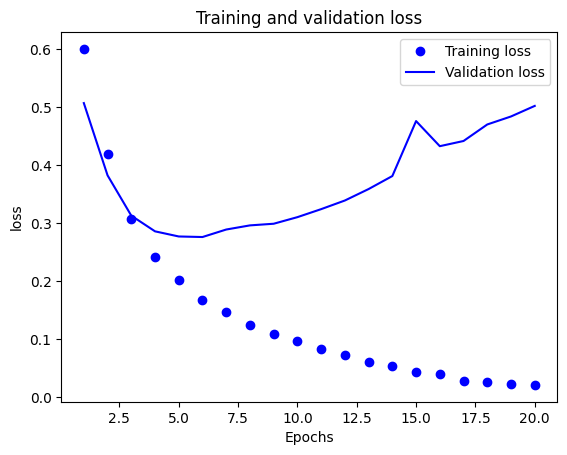

In [40]:
#4-8 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo" , label = "Training loss")

plt.plot(epochs, val_loss_values, "b" , label = "Validation loss")
plt.title("Traing and validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

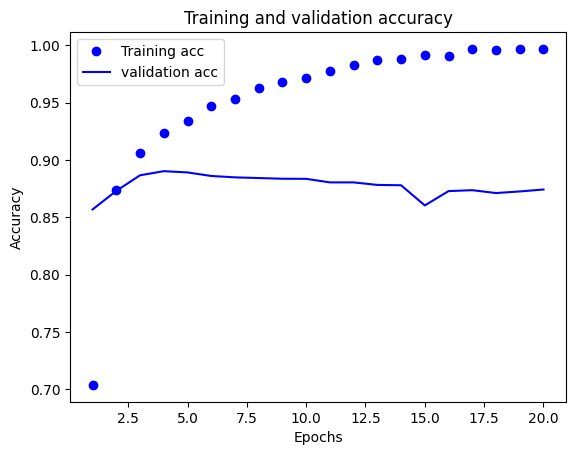

In [41]:
#4-9 훈련과 검증 정확도 그리기
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs,acc, "bo" , label ="Training acc")
plt.plot(epochs , val_acc, "b" , label = "validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
#4-10 모델을 처음부터 다시 훈련하기
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])
model.compile(optimizer="rmsprop" ,
              loss= "binary_crossentropy" ,
              metrics = ["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 25000
'y' sizes: 15000
